
![](SWTitle.jpg)

## Introduction

While waiting for the movie, _"Star Wars: The Force Awakens"_ to come out (released in 2015), the team at _"FiveThirtyEight"_ [(website)](https://fivethirtyeight.com/ "website") became interested in answering some questions about Star Wars fans. In particular, they wondered: "Does the rest of America realize that _"The Empire Strikes Back"_ is clearly the best of the bunch?"

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool _"SurveyMonkey"_ [(website)](https://www.surveymonkey.com/ "website"). They received 835 total responses, which can be downloaded from their GitHub repository [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey "here").




## Project Objective

I'm a Star Wars movie fan and am very curious about the survey results.

The objective of this project is to answer the following questions:

1. Regarding the six Star Wars movies released between 1977 and 2003; is the one preferred most by the surveyed viewers the same as the "FiveThirtyEight" team's choice - _"The Empire Strikes Back"_?

2. For the same six movies, what is the order of movie preference from first to sixth among the viewers surveyed?

3. Is there a relationship between movie preference and volume of people who watched the movies?

4. Do male and female viewers agree on the order of movie preference from first to sixth? Looking forward to check that one out!!

5. If there is a relationship between movie preference and volume of people who watched the movies, is it the same for males and females?

6. There are four age groups identified in the survey. Is there any difference in movie preference among age groups?

7. There are fourteen characters identified in the survey who were portrayed in some or all of the movies identified. Who were the top 5 most liked and the bottom 5 most disliked?

**Join me for this interesting analysis. The results may just be <span style="color:red">"out of this world"</span>!**


### Step I: Data Clean-Up

Regarding data analysis, why should data cleansing be the first step?

Data cleansing is important because it improves data quality and in doing so, increases overall productivity as well as output accuracy.

I will start with looking at the overall condition of the raw data and then decide what type of clean-up is most appropriate in order to answer the above questions. It is possible to waste time during the data clean-up stage by revising data that is not relevant to any of the questions.

In [1]:
# import python libraries.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import HTML, display, Markdown

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# provide various forms of data output to help determine type
# and amount of "data clean-up" needs to be done.
print(star_wars.columns, '\n')
print(len(star_wars), '\n')

# remove missing value from the "RespondentID" column.
star_wars = star_wars.loc[star_wars["RespondentID"].notnull()]
print(len(star_wars), '\n')
print(star_wars.head(3))

np.warnings.filterwarnings("ignore")

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Observations

There was one row which had a missing value in the "RespondentID" column, so I removed that row.

Regarding columns with information required in order to answer the questions posed in the introduction, various types of conversions will be required:

1. Convert "Yes" and "No" answers to boolean, True and False in order to perform calculations.

2. Convert data in string format to numeric in order to calculate averages.

3. Change various column titles which have no meaning to ones that do and long ones to shorter ones.

## <span style="color:blue">Question #1</span>

Regarding the six Star Wars movies released between 1977 and 2003; is the one preferred most by the surveyed viewers the same as the "FiveThirtyEight" team's choice?

In [2]:
# convert "Yes" and "No" answers to boolean,
# True and False in order to perform calculations.
yes_no = {"Yes":True, "No":False}

# shorten column titles to simplify.
star_wars.loc[:,"Question1"] = \
  star_wars.loc[:,"Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars.loc[:,"Question2"] = \
  star_wars.loc[:,"Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
star_wars.copy
Have_You = star_wars.loc[:,"Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)
Q1_Data = star_wars.loc[:,"Question1"].value_counts(dropna=False)
Q2_Data =(star_wars.loc[:,"Question2"]).value_counts(dropna=False)

print(len(star_wars), '\n')
print(Have_You, '\n')
print(Q1_Data, '\n')
print(Q2_Data, '\n')

# drop the survey responders who did not see any star wars movies
# as they had no input to offer.
star_wars2 = star_wars[star_wars.loc[:,"Question1"] == True]
print(len(star_wars2), '\n')

Q1_Data = star_wars2.loc[:,"Question1"].value_counts(dropna=False)
print(Q1_Data)

1186 

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

True     936
False    250
Name: Question1, dtype: int64 

True     552
NaN      350
False    284
Name: Question2, dtype: int64 

936 

True    936
Name: Question1, dtype: int64


In [3]:
# convert "Yes" and "No" answers to boolean, True and False
# in order to perform calculations.
Ep1 = {"Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False}
Ep2 = {"Star Wars: Episode II  Attack of the Clones": True,
    np.NaN: False}
Ep3 = {"Star Wars: Episode III  Revenge of the Sith": True,
    np.NaN: False}
Ep4 = {"Star Wars: Episode IV  A New Hope": True,
    np.NaN: False}
Ep5 = {"Star Wars: Episode V The Empire Strikes Back": True,
    np.NaN: False}
Ep6 = {"Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False}

# create new columns with titles that have meaning.
star_wars2.loc[:,"Episode_1"] = star_wars2.loc[:,
    "Which of the following Star Wars films have you seen? Please select all that apply."].map(Ep1)
star_wars2.loc[:,"Episode_2"] = star_wars2.loc[:,"Unnamed: 4"].map(Ep2)
star_wars2.loc[:,"Episode_3"] = star_wars2.loc[:,"Unnamed: 5"].map(Ep3)
star_wars2.loc[:,"Episode_4"] = star_wars2.loc[:,"Unnamed: 6"].map(Ep4)
star_wars2.loc[:,"Episode_5"] = star_wars2.loc[:,"Unnamed: 7"].map(Ep5)
star_wars2.loc[:,"Episode_6"] = star_wars2.loc[:,"Unnamed: 8"].map(Ep6)

# convert the columns with string type values to numeric.
star_wars2[star_wars2.columns[9:15]] = star_wars2[star_wars2.columns[9:15]].astype(float)
star_wars2.dtypes

star_wars2 = star_wars2.rename(columns=
             {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":
              "R_Ep1_1999"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 10": "R_Ep2_2002"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 11": "R_Ep3_2005"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 12": "R_Ep4_1977"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 13": "R_Ep5_1980"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 14": "R_Ep6_1983"})
print(star_wars2.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'R_Ep1_1999', 'R_Ep2_2002', 'R_Ep3_2005', 'R_Ep4_1977', 'R_Ep5_1980',
       'R_Ep6_1983',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of th

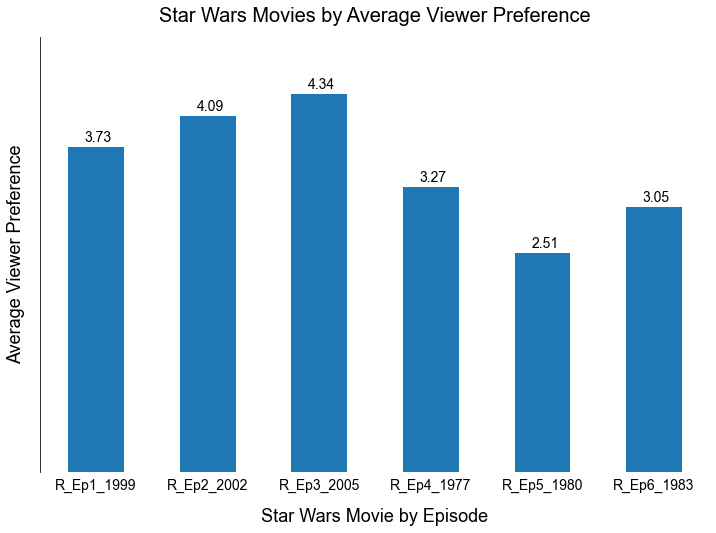

In [4]:
# calculate the average viewer preference for each of the six Star Wars movies.
# plot a bar graph to visually compare the average viewer preference results. 
df = star_wars2[["R_Ep1_1999","R_Ep2_2002","R_Ep3_2005", "R_Ep4_1977","R_Ep5_1980", "R_Ep6_1983"]].mean(axis=0)
ax = df.plot(kind='bar', figsize=(12,8))
ax.set_ylim(0,5)
plt.xticks(fontsize=14, rotation=0)
ax.set_xlabel("Star Wars Movie by Episode", fontsize=18, labelpad=15)
ax.set_ylabel("Average Viewer Preference", fontsize=18, labelpad=15)
plt.title("Star Wars Movies by Average Viewer Preference", fontsize=20, pad=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=False, labelleft=False)

x_offset = -0.10
y_offset = 0.06
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=14)
sns.set_style("white")
plt.show()

## <span style="color:green">Question #1 Answer</span>

**Movie Preference Definition:** The survey requested respondents to rank the six movies in order of preference from 1 to 6. One relates to the viewer's first choice, two is second choice and so on, with six being last choice. The lower the average, the higher that movie was ranked as a preferred choice.

The bar graph above shows the average choice rank for each of the six movies. I purposely included the calculated average at the top of each bar because I will need to use those values later in this project.

The fifth bar above relates to the movie _"Star Wars: Episode V The Empire Strikes Back"_. This had the lowest average (2.51) and represents the first choice of most of the survey respondents.

The third bar above relates to the movie _"Star Wars: Episode III  Revenge of the Sith"_. This had the highest average (4.34) and represents the last choice of most of the survey respondents.

**<span style="color:blue">So, at this point should we just conclude that the team at _"FiveThirtyEight"_ is correct in saying _"Star Wars: Episode V The Empire Strikes Back"_ is the best of the bunch as confirmed by the survey results? We could. However, I would like to dig a little deeper before making that conclusion.</span>**

**The averages themselves are all different. Can we then say they are significantly different from each other statistically? No, if we do not conduct an appropriate hypothesis test which yields the result, "Reject the Null Hypothesis". It's possible that the values are different just by "chance" alone.**

So, what is the appropriate hypothesis test to use in this case? Wouldn't you like to know! Before we go there, I will generate two other types of charts/graphs to give us a more complete picture of viewer movie preference than just looking at calculated averages.


## <span style="color:blue">Question #2</span>

For the six movies, what is the order of movie preference from first to sixth among the viewers surveyed?

## Histogram Plot

Let's generate a histogram that describes viewer preference distribution for each movie.

There is much to see in each of these plots!

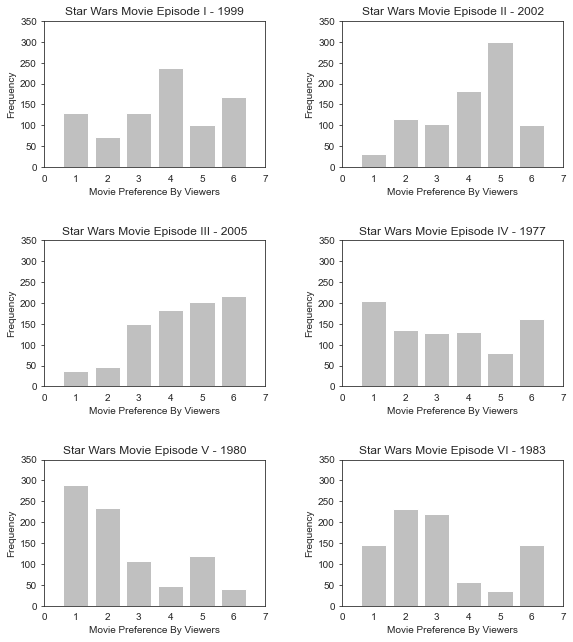

In [5]:
# generate a histogram.
# the "bins" code helps to center
# the x label values with each bar.
bins = np.arange(8) - 0.4

fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows=3, ncols=2, figsize=(8,9))

ax0.hist(star_wars2["R_Ep1_1999"], bins=bins, histtype="bar", color="silver", width=0.8)
ax0.set_title("Star Wars Movie Episode I - 1999", fontsize=12)
ax0.set_xlabel("Movie Preference By Viewers", fontsize=10)
ax0.set_ylabel("Frequency", fontsize=10)
ax0.set_xlim(0,7)
ax0.set_ylim(0,350)
ax0.tick_params(bottom=False, left=True)

ax1.hist(star_wars2["R_Ep2_2002"], bins=bins, histtype="bar", color="silver", width=0.8)
ax1.set_title("Star Wars Movie Episode II - 2002", fontsize=12)
ax1.set_xlabel("Movie Preference By Viewers", fontsize=10)
ax1.set_ylabel("Frequency", fontsize=10)
ax1.set_xlim(0,7)
ax1.set_ylim(0,350)
ax1.tick_params(bottom=False, left=True)

ax2.hist(star_wars2["R_Ep3_2005"], bins=bins, histtype="bar", color="silver", width=0.8)
ax2.set_title("Star Wars Movie Episode III - 2005", fontsize=12)
ax2.set_xlabel("Movie Preference By Viewers", fontsize=10)
ax2.set_ylabel("Frequency", fontsize=10)
ax2.set_xlim(0,7)
ax2.set_ylim(0,350)
ax2.tick_params(bottom=False, left=True)

ax3.hist(star_wars2["R_Ep4_1977"], bins=bins, histtype="bar", color="silver", width=0.8)
ax3.set_title("Star Wars Movie Episode IV - 1977", fontsize=12)
ax3.set_xlabel("Movie Preference By Viewers", fontsize=10)
ax3.set_ylabel("Frequency", fontsize=10)
ax3.set_xlim(0,7)
ax3.set_ylim(0,350)
ax3.tick_params(bottom=False, left=True)

ax4.hist(star_wars2["R_Ep5_1980"], bins=bins, histtype="bar", color="silver", width=0.8)
ax4.set_title("Star Wars Movie Episode V - 1980", fontsize=12)
ax4.set_xlabel("Movie Preference By Viewers", fontsize=10)
ax4.set_ylabel("Frequency", fontsize=10)
ax4.set_xlim(0,7)
ax4.set_ylim(0,350)
ax4.tick_params(bottom=False, left=True)

ax5.hist(star_wars2["R_Ep6_1983"], bins=bins, histtype="bar", color="silver", width=0.8)
ax5.set_title("Star Wars Movie Episode VI - 1983", fontsize=12)
ax5.set_xlabel("Movie Preference By Viewers", fontsize=10)
ax5.set_ylabel("Frequency", fontsize=10)
ax5.set_xlim(0,7)
ax5.set_ylim(0,350)
ax5.tick_params(bottom=False, left=True)

# the code below helps to create reasonable spacing
# between each graph, horizontally and vertically.
fig.tight_layout(pad=1, w_pad=4.0, h_pad=3.0)
plt.show()

### Observations

Each histogram above provides a picture (shapes and peaks) of viewer preference distribution for each movie. Each plot provides a view of where the majority of viewer preference ratings were for that movie. Notice that most of the distributions are not symmetrical around the average.

We see that the distribution of the least preferred movie _"Star Wars: Episode III  Revenge of the Sith"_ is skewed to the left while the distribution of the most preferred movie _"Star Wars: Episode V The Empire Strikes Back"_ is skewed to the right.

About 35% of the survey responders made Episode V movie their first choice, while about 26% chose Episode III as their last choice. Episode II visually looks to be worse than Episode III since the volume of 5th choice bar is higher than any of the bars of Episode III. Let's take a look at the results on a Box and Whisker plot and see what that tells us.

## Box and Whisker Plot

The Box and Whisker plot has potential to provide us a little more visual information that the Histogram plot.

Here's a general description of typical Box and Whisker plot format as shown in the plot further below:

1. The box portion defines where 50% of all the dataset values are contained.

2. The lines ("whiskers") protruding from either top or bottom or both of each box is where 25% of the values are contained.

3. The red horizontal line identifies the calculated median value of each dataset.

4. The solid small square black box identifies the calculated average of each dataset.

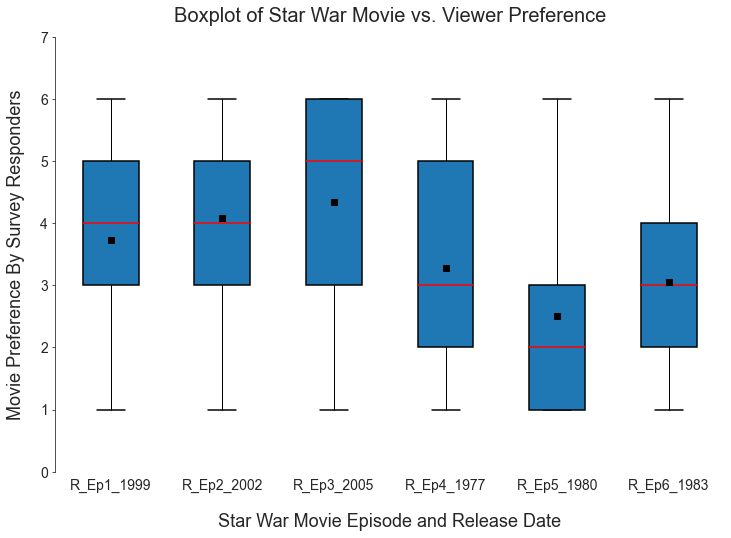

In [6]:
# generate a box and whisker plot for viewer
# preference distribution regarding each movie.
fig, ax = plt.subplots(figsize=(12,8))
color=dict(boxes="k", whiskers="k", medians="red", caps="k")
boxprops = dict(linestyle="-", linewidth=1.5)
medianprops = dict(linestyle="-", linewidth=1.5, color='red')
meanprops=dict(marker="s",markerfacecolor="black", markeredgecolor="black")
capprops=dict(linestyle="-", linewidth=1.5)
plt.ylim(0,7)
plt.ylabel("Movie Preference By Survey Responders", fontsize=18, labelpad=15)
plt.xlabel("Star War Movie Episode and Release Date",fontsize=18, labelpad=20)
plt.title("Boxplot of Star War Movie vs. Viewer Preference", fontsize=20, pad=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=0)
ax.tick_params(bottom=False, left=True, labelleft=True)
sns.despine(bottom=True)
star_wars3 = star_wars2[["R_Ep1_1999","R_Ep2_2002","R_Ep3_2005","R_Ep4_1977",\
                         "R_Ep5_1980", "R_Ep6_1983"]]

star_wars3.boxplot(grid=False, rot=0, showmeans=True, meanprops=meanprops,
                color = color, boxprops=boxprops, capprops=capprops,
                medianprops=medianprops, patch_artist=True)
plt.show()

### Observations

**Box Comparisons:** The fifth box above relating to the movie _"Star Wars: Episode V The Empire Strikes Back"_ is the only one showing at least 50% of the viewer ratings as either first, second or third choice. The third box above relating to the movie _"Star Wars: Episode III  Revenge of the Sith"_ is actually weighted more at the top end than the first and second boxes. This means that the distribution of values is more heavily skewed (i.e. non-symmetrical) than boxes one and two. This is why both the mean and median for Episode III is higher than both for Episodes I and II.

Why show the median and average values? Let's look at the definition of each and when they are most likely used in data analysis.

**Median Definition:** The center value in the dataset where 50% of the values are below it and 50% are above. The median is often used with data that can only be reported in whole numbers; data that cannot be broken down into decimals; number of people or ..., survey values, etc. This type of data is referred to as ordinal data.

Sometimes we hear cases where silly values are quoted in news reports. For example; I've heard it mentioned that the **average** number of children per family in country _XYZ_ is **1.3**. So does that mean that on average each family has one child and the mother is three months pregnant (i.e. the decimal 0.3)? Probably not. It would be more appropriate to say that the **median** number of children in country _XYZ_ is 1.

**Average Definition:** The average is calculated by dividing the sum of the values in the dataset by their number of values. The variation of magnitude in distance away from the central tendency affects the calculation average much more than the median. That is why the locations of the averages (black box) shown above is not necessarily the same as the medians (red line).

In the case of survey data, median or "mean rank" is more appropriate to use than average when testing for equality of central tendency because whole numbers are used (i.e. 1, 2, 3, ...) as opposed to numbers with decimals. In this case, we would use a non-parametric test called the _"Kruskal-Wallis test"_ for the hypothesis test. 


### Kruskal-Wallis Non-Parametric Test

The Kruskal-Wallis test is said to test whether the "mean rank" is the same in every group. "Mean rank" is neither the same as average nor median, but is somewhere in between. It is generally used for ordinal data, which is what we have in this dataset.

When there are more than two groups in a data set, it is testing whether at least one has a significantly different "mean rank" than all the others. This dataset has six groups, that is; the six movies.

The null hypothesis of the Kruskal–Wallis test is that the "mean ranks" of the groups are the same. Only one of the six needs to be significantly different in order to yield the result: "Reject the null hypothesis". 

If we end up rejecting the null hypothesis, then we need to follow that up with what is called, "post-hoc" analyses in order to conclude how many of the group "mean ranks" are significantly different and in what order the movies are preferred.

In [7]:
# import the scipy library in order to
# execute the Kruskal-Wallis Test.
from scipy.stats import kruskal

# any missing values in the columns must be
# removed in order to execute this test.
data1 = star_wars2["R_Ep1_1999"].dropna(axis=0)
data2 = star_wars2["R_Ep2_2002"].dropna(axis=0)
data3 = star_wars2["R_Ep3_2005"].dropna(axis=0)
data4 = star_wars2["R_Ep4_1977"].dropna(axis=0)
data5 = star_wars2["R_Ep5_1980"].dropna(axis=0)
data6 = star_wars2["R_Ep6_1983"].dropna(axis=0)

# perform the Kruskal_Wallis test initially
# and for the post-hoc tests.
print("Test Equality of Mean Ranks for Six Movies")
stat, p = kruskal(data1, data2, data3, data4, data5, data6)
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
	print("Probably the same distribution")
else:
	print("Reject the Null Hypothesis")
print('\n') 

print("Test Equality of Mean Ranks for Five Movies")
stat, p = kruskal(data1, data2, data3, data4, data6)
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
	print("Probably the same distribution")
else:
	print("Reject the Null Hypothesis")
print('\n') 

print("Test Equality of Mean Ranks for Four Movies")
stat, p = kruskal(data1, data2, data4, data6)
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
	print("Probably the same distribution")
else:
	print("Reject the Null Hypothesis")
print('\n') 

print("Test Equality of Mean Ranks for Two Movies")
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
	print("Probably the same distribution")
else:
	print("Reject the Null Hypothesis")
print('\n')

print("Test Equality of Mean Ranks for Two Movies")
stat, p = kruskal(data4, data6)
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
	print("Probably the same distribution")
else:
	print("Reject the Null Hypothesis")

Test Equality of Mean Ranks for Six Movies
stat=669.866, p=0.00000
Reject the Null Hypothesis


Test Equality of Mean Ranks for Five Movies
stat=344.66144, p=0.00000
Reject the Null Hypothesis


Test Equality of Mean Ranks for Four Movies
stat=196.204, p=0.00000
Reject the Null Hypothesis


Test Equality of Mean Ranks for Two Movies
stat=19.952, p=0.00001
Reject the Null Hypothesis


Test Equality of Mean Ranks for Two Movies
stat=4.401, p=0.03592
Reject the Null Hypothesis


## <span style="color:green">Question #2 Answer</span>

All of the null hypotheses tested above were rejected. This means that there is sufficient statistical evidence to infer that none of the movie choice mean ranks come from the same population, that is; they are all significantly different.

The survey result yields the movie preference choices in the following order:

&nbsp;&nbsp;&nbsp;&nbsp;**<span style="color:green">First:</span>** Star Wars: Episode V The Empire Strikes Back - Released 1980

&nbsp;&nbsp;&nbsp;&nbsp;**<span style="color:green">Second:</span>** Star Wars: Episode VI Return of the Jedi - Released 1983

&nbsp;&nbsp;&nbsp;&nbsp;**<span style="color:green">Third:</span>** Star Wars: Episode IV  A New Hope - Released 1977

&nbsp;&nbsp;&nbsp;&nbsp;**<span style="color:green">Fourth:</span>** Star Wars: Episode I  The Phantom Menace - Released 1999

&nbsp;&nbsp;&nbsp;&nbsp;**<span style="color:green">Fifth:</span>** Star Wars: Episode II  Attack of the Clones;  Released 2002

&nbsp;&nbsp;&nbsp;&nbsp;**<span style="color:green">Sixth:</span>** Star Wars: Episode III  Revenge of the Sith - Released 2003

I find this to be very interesting. This is why I included the movie release dates. That may have something to do with the sequence of preferences.

The top 3 choices were the original 3 released on or before 1983. The bottom 3 choices started with release date 1999, sixteen years after Episode VI. Almost a full generation later.

That could be relevant to the order of choices for some of the following reasons:

1. The directors, screen writers and producers were all different for the top 3 movies compared to the bottom 3. You can find out who the directors, screen writers and producers were right [here](https://en.wikipedia.org/wiki/List_of_Star_Wars_films "here") on Wikipedia.

2. The first three movies released may have had a lot more emphasis placed on character development than the last three. The last three may have had a lot more emphasis placed on special effects such as CGI (computer generated imagery), SFX, SPFX and so on.

3. The time span between the last of the top3 and the first of the bottom 3 is sixteen years. Could age of the viewers come into play here as a reason for the first three movies that were released being the top 3 choices? We'll see later in this project when I break out the preference choices into age groups.

4. With a sixteen year gap between the first group of 3 movies and the second three, different actors needed to be involved. There may have been a significant difference in acting quality between the two groups of movies. 

## <span style="color:blue">Question #3</span>

Is there a relationship between movie preference and volume of people who watched the movies?

First, determine the quantity of the survey responder viewers for each of the six movies.

Second, create a dataset with viewer preference average in one column and quantity of viewers in the second column.

Last, read in the datafile, generate a scatterplot with line of best fit and use the Pearson r test to determine if there is a significant relationship between the two variables.

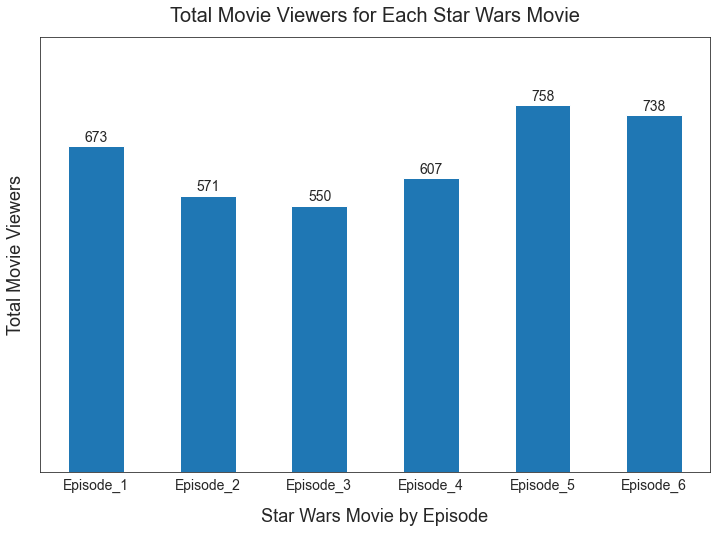

In [8]:
# generate a box plot for number of viewers for each of the six movies.
df = star_wars2[["Episode_1","Episode_2","Episode_3","Episode_4",\
                 "Episode_5", "Episode_6"]].sum(axis=0)
ax = df.plot(kind="bar", figsize=(12,8))
ax.set_ylim(0,900)
plt.xticks(fontsize=14, rotation=0)
ax.set_title("Total Movie Viewers for Each Star Wars Movie", fontsize=20, pad=15)
ax.set_xlabel("Star Wars Movie by Episode", fontsize=18, labelpad=15)
ax.set_ylabel("Total Movie Viewers", fontsize=18, labelpad=15)
ax.tick_params(bottom=False, left=False, labelleft=False)

x_offset = -0.10
y_offset = 10.0
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=14)
sns.set_style("white")
plt.show()

### Observations

I purposely showed the number of viewers at the top of each bar as I will need those values to generate a scatterplot.

It looks like the volume is closely tied in with movie preference in an inverse manner. Let's check that out with a scatterplot.

## Scatterplot

best fit line:
y = 880.18 + -65.91x


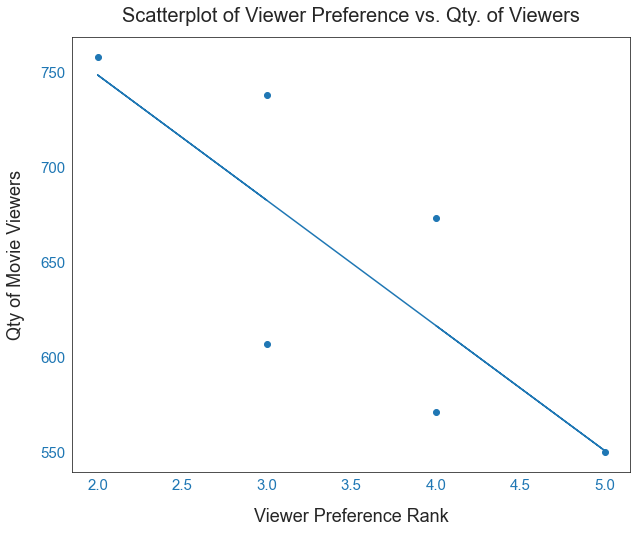

stat=-0.878, p=0.021
Probably dependent


In [9]:
# import the *.csv file comprising the movie
# preference and movie attendance data.
relation = pd.read_csv("Relationship.csv")

# define x and y for line of best fit computation.
X = relation["Median_Choice"]
Y = relation["Qty_Viewers"]

# solve for a and b
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print("best fit line:\ny = {:.2f} + {:.2f}x".format(a, b))
    return a, b

# solution
a, b = best_fit(X, Y)

# plot points and fit line
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]

plt.plot(X, yfit)
plt.title("Scatterplot of Viewer Preference vs. Qty. of Viewers", fontsize=20, pad=15)
plt.xlabel("Viewer Preference Rank", fontsize=18, labelpad=15)
plt.ylabel("Qty of Movie Viewers", fontsize=18, labelpad=15)
ax.tick_params(axis='x', colors='C0', labelrotation=0, labelsize=15)
ax.tick_params(axis='y', colors='C0', labelsize=15)
plt.show()

# perform the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = relation["Average_Choice"]
data2 = relation["Qty_Viewers"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
	print("Probably dependent")

## <span style="color:green">Question #3 Answer</span>

The scatterplot clearly shows there is an inverse relationship between movie preferred choice and volume of viewers. The relationship is significant in that the p-value for the Pearson r test is less than 0.05 (p=0.021).

As the preference to watch a specific movie declines (i.e. preference rank number **decreases** left to right on graph further away from 1), the volume of viewers declines.

This makes sense to me. Word of mouth typically gets around among friends regarding comments on movies like, _"Revenge of the 
Sith"_ was terrible or _"The Empire Strikes Back"_ was fantastic. That would potentially influence the number of people considering to watch or not to watch a movie based on word of mouth comments.

Also, many people may depend upon ratings published by critics on "Rotten Tomatoes" or other movie critics to base their decision on whether to watch a movie or not. On Rotten Tomatoes, the rating for _"Revenge of the Sith"_ was 80% and for _"Return of the Jedi"_ at 94%. It's interesting that the Audience Score even had a much bigger difference between the two: "Revenge of the Sith" 66% and "Return of the Jedi" 96% !!!

## <span style="color:blue">Question #4</span>

Do male and female viewers agree on the order of movie preference from first to sixth?

In [10]:
# determine split between male and female qty. viewers
# and quantity of missing values.
Gender_Split = star_wars2["Gender"].value_counts(dropna=False)
print(Gender_Split)

# create separate male and female DataFrames.
males = star_wars2[star_wars2["Gender"] == "Male"]
females = star_wars2[star_wars2["Gender"] == "Female"]

# calculate mean of each movie
# preference for male and female.
m1 = males["R_Ep1_1999"].mean(axis=0)
m2 = males["R_Ep2_2002"].mean(axis=0)
m3 = males["R_Ep3_2005"].mean(axis=0)
m4 = males["R_Ep4_1977"].mean(axis=0)
m5 = males["R_Ep5_1980"].mean(axis=0)
m6 = males["R_Ep6_1983"].mean(axis=0)
f1 = females["R_Ep1_1999"].mean(axis=0)
f2 = females["R_Ep2_2002"].mean(axis=0)
f3 = females["R_Ep3_2005"].mean(axis=0)
f4 = females["R_Ep4_1977"].mean(axis=0)
f5 = females["R_Ep5_1980"].mean(axis=0)
f6 = females["R_Ep6_1983"].mean(axis=0)

Male      423
Female    397
NaN       116
Name: Gender, dtype: int64


<h3><span style="color:blue"> X-Axis Legend </span></h3>

Ep1 = Star Wars: Episode I The Phantom Menace;      Released 1999
Ep2 = Star Wars: Episode II  Attack of the Clones;  Released 2002
Ep3 = Star Wars: Episode III  Revenge of the Sith;  Released 2005
Ep4 = Star Wars: Episode IV  A New Hope;            Released 1977
Ep5 = Star Wars: Episode V The Empire Strikes Back; Released 1980
Ep6 = Star Wars: Episode VI Return of the Jedi;     Released 1983 



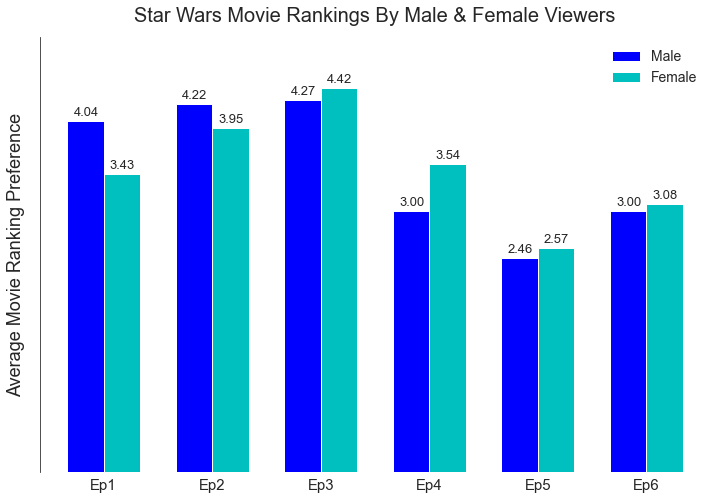

In [11]:
# create x-axis legend in output.
display(Markdown('<h3><span style="color:blue"> X-Axis Legend </span></h3>'))

print("Ep1 = Star Wars: Episode I The Phantom Menace;      Released 1999")
print("Ep2 = Star Wars: Episode II  Attack of the Clones;  Released 2002")
print("Ep3 = Star Wars: Episode III  Revenge of the Sith;  Released 2005")
print("Ep4 = Star Wars: Episode IV  A New Hope;            Released 1977")
print("Ep5 = Star Wars: Episode V The Empire Strikes Back; Released 1980")
print("Ep6 = Star Wars: Episode VI Return of the Jedi;     Released 1983", '\n')

# generate a comparative bar graph
# for male and female movie preferences.
df=pd.DataFrame({"Male":(m1, m2, m3, m4, m5, m6),"Female":(f1, f2, f3, f4, f5, f6)},
                index=["Ep1","Ep2", "Ep3", "Ep4", "Ep5", "Ep6"])

ax = df.plot(kind="bar", color=["b","c"], width=0.67, figsize=(12,8), ylim=(0,5))
plt.xticks(fontsize=15, rotation=0)
ax.set_ylabel("Average Movie Ranking Preference", fontsize=18, labelpad=15)
plt.title("Star Wars Movie Rankings By Male & Female Viewers", fontsize=20, pad=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=False, labelleft=False)
plt.legend(frameon=False, fontsize=14)

# establish position of bar values at top of bars
x_offset = -0.11
y_offset = 0.06
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=13)
sns.set_style("white")
plt.show()

## <span style="color:green">Question #4 Answer</span>

The sequential pattern of movie preferences from 1 to 6 is much the same for male and female viewers.

However, the difference in magnitude of preference rankings between movies is greater for females than males. Why that is, I don't know. Maybe it has something to do with great affinity for certain movie characters and strong dislike for others.

Let's see if there's a difference in relationship between movie preference and quantity of viewers for male and female.

## <span style="color:blue">Question #5</span>

If there is a relationship between movie preference and volume of people watching the movies, is it the same for males and females?

We'll need to determine the number of male and female viewers for each movie to answer this question.

<h3><span style="color:blue"> X-Axis Legend  </span></h3>

Ep1 = Star Wars: Episode I The Phantom Menace;      Released 1999
Ep2 = Star Wars: Episode II  Attack of the Clones;  Released 2002
Ep3 = Star Wars: Episode III  Revenge of the Sith;  Released 2005
Ep4 = Star Wars: Episode IV  A New Hope;            Released 1977
Ep5 = Star Wars: Episode V The Empire Strikes Back; Released 1980
Ep6 = Star Wars: Episode VI Return of the Jedi;     Released 1983


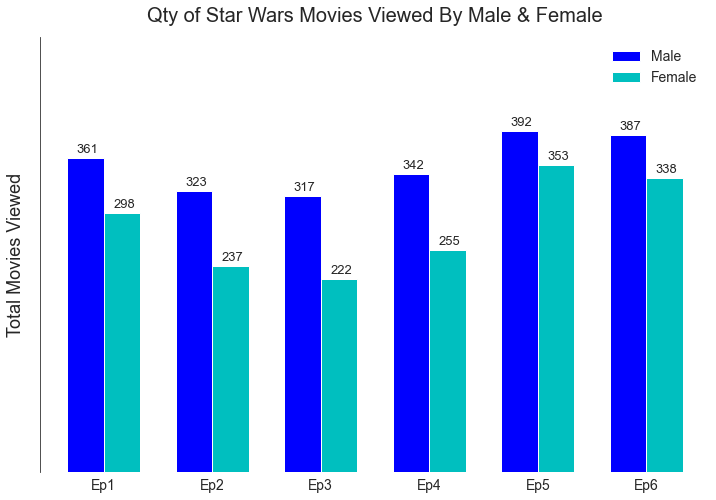

In [12]:

display(Markdown('<h3><span style="color:blue"> X-Axis Legend  </span></h3>'))
  
print("Ep1 = Star Wars: Episode I The Phantom Menace;      Released 1999")
print("Ep2 = Star Wars: Episode II  Attack of the Clones;  Released 2002")
print("Ep3 = Star Wars: Episode III  Revenge of the Sith;  Released 2005")
print("Ep4 = Star Wars: Episode IV  A New Hope;            Released 1977")
print("Ep5 = Star Wars: Episode V The Empire Strikes Back; Released 1980")
print("Ep6 = Star Wars: Episode VI Return of the Jedi;     Released 1983")

# determine total number of male and female viewers for each movie.
mv1 = males["Episode_1"].sum(axis=0)
mv2 = males["Episode_2"].sum(axis=0)
mv3 = males["Episode_3"].sum(axis=0)
mv4 = males["Episode_4"].sum(axis=0)
mv5 = males["Episode_5"].sum(axis=0)
mv6 = males["Episode_6"].sum(axis=0)
fv1 = females["Episode_1"].sum(axis=0)
fv2 = females["Episode_2"].sum(axis=0)
fv3 = females["Episode_3"].sum(axis=0)
fv4 = females["Episode_4"].sum(axis=0)
fv5 = females["Episode_5"].sum(axis=0)
fv6 = females["Episode_6"].sum(axis=0)

# use appropriate plot commands to generate a comparative bar graph
# for male and female movie viewers by volume.
df=pd.DataFrame({"Male":(mv1, mv2, mv3, mv4, mv5, mv6),
                 "Female":(fv1, fv2, fv3, fv4, fv5, fv6)},
                index=["Ep1","Ep2", "Ep3", "Ep4", "Ep5", "Ep6"])

ax = df.plot(kind="bar", color=["b","c"], width=0.67, figsize=(12,8), ylim=(0,500))
plt.xticks(fontsize=14, rotation=0)
ax.set_ylabel("Total Movies Viewed", fontsize=18, labelpad=15)
plt.title("Qty of Star Wars Movies Viewed By Male & Female", fontsize=20, pad=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=False, labelleft=False)
plt.legend(frameon=False, fontsize=14)

# establish position of bar values at top of bars
x_offset = -0.08
y_offset = 6
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=13)


### Observations

The pattern of viewer quantity across the six movies is much the same for male and female.

The fact that there are more male viewers than female for all six movies is not relevant to the questions. It just means that there were more males than females choosing to be involved in the survey.

best fit line:
y = 562.78 + -79.74x


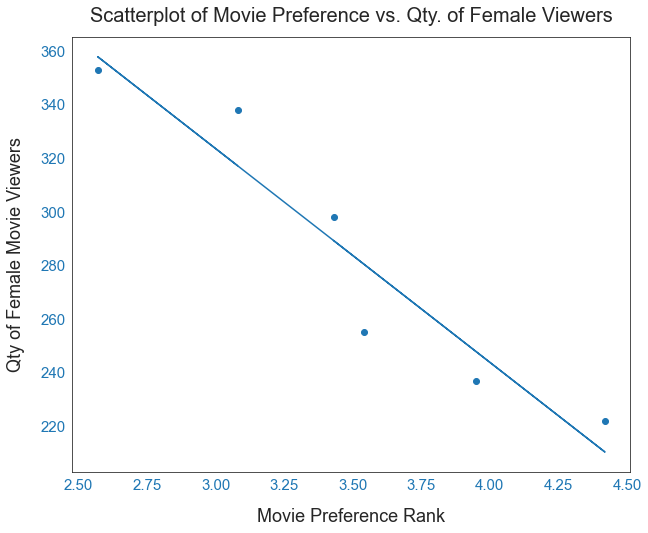

stat=-0.950, p=0.004
Probably dependent


best fit line:
y = 467.43 + -32.52x


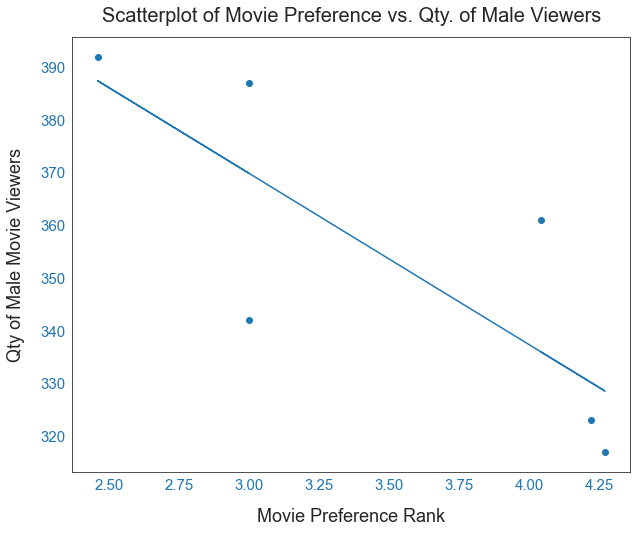

stat=-0.790, p=0.061
Probably independent


In [13]:
# import the *.csv file comprising the movie
# preference and movie attendance data for females.
relation = pd.read_csv("Male Female Rankings.csv")

# define x and y for line of best fit computation.
X = relation["Female_Rankings"]
Y = relation["Qty_Female_Viewers"]

# solve for a and b
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print("best fit line:\ny = {:.2f} + {:.2f}x".format(a, b))
    return a, b

# solution
a, b = best_fit(X, Y)

# plot points and fit line
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
plt.title("Scatterplot of Movie Preference vs. Qty. of Female Viewers", fontsize=20, pad=15)
plt.xlabel("Movie Preference Rank", fontsize=18, labelpad=15)
plt.ylabel("Qty of Female Movie Viewers", fontsize=18, labelpad=15)
ax.tick_params(axis='x', colors='C0', labelsize=15)
ax.tick_params(axis='y', colors='C0', labelsize=15)
plt.show()

# perform the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = relation["Female_Rankings"]
data2 = relation["Qty_Female_Viewers"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
	print("Probably dependent")
print('\n')
    
# import the *.csv file comprising the movie
# preference and movie attendance data for males.
relation = pd.read_csv("Male Female Rankings.csv")

# define x and y for line of best fit computation.
X = relation["Male_Rankings"]
Y = relation["Qty_Male_Viewers"]

# solve for a and b
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print("best fit line:\ny = {:.2f} + {:.2f}x".format(a, b))
    return a, b

# solution
a, b = best_fit(X, Y)

# plot points and fit line
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
plt.title("Scatterplot of Movie Preference vs. Qty. of Male Viewers", fontsize=20, pad=15)
plt.xlabel("Movie Preference Rank", fontsize=18, labelpad=15)
plt.ylabel("Qty of Male Movie Viewers", fontsize=18, labelpad=15)
ax.tick_params(axis='x', colors='C0', labelsize=15)
ax.tick_params(axis='y', colors='C0', labelsize=15)
plt.show()

# perform the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = relation["Male_Rankings"]
data2 = relation["Qty_Male_Viewers"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print("Probably independent")
else:
	print("Probably dependent")

## <span style="color:green">Question #5 Answer</span>

**<span style="color:red">WOW!!</span>**

What a huge difference in scatterplot relationship for male and female viewers!!

  **FEMALE VIEWERS**\
The strength of relationship between movie preference and quantity of female viewers for each movie is strong! Strength of relationship is calculated by squaring the correlation coefficient r. The r value for females is -0.95. Squaring that yields a strength of relationship value of **90%**!!

  **MALE VIEWERS**\
The strength of relationship between movie preference and quantity of male viewers for each movie is weak! In fact, the _Pearson r_ p value for males is 0.061. Since it is greater than 0.05, we can say there is **no relationship** for male viewers.

The correlation coefficient r for male viewers is -0.79. Squaring that yields a strength of relationship value of only **62%**.

## <span style="color:blue">Question #6</span>

There are four age groups identified in the survey. Is there any difference in movie preference among age groups?

In [14]:
# determine age groupings.   
Age_Data = star_wars2["Age"].value_counts(dropna=False)
print(Age_Data)

45-60    240
30-44    207
> 60     193
18-29    180
NaN      116
Name: Age, dtype: int64


In [15]:
# define DataFrame names for each age
# group and missing values.
grp5 = star_wars2[star_wars2["Age"].isna()]
grp1 = star_wars2[star_wars2["Age"] == "18-29"]
grp2 = star_wars2[star_wars2["Age"] == "30-44"]
grp3 = star_wars2[star_wars2["Age"] == "45-60"]
grp4 = star_wars2[star_wars2["Age"] == "> 60"]

<h3><span style="color:blue"> X-Axis Legend  </span></h3>

Ep1 = Star Wars: Episode I The Phantom Menace;      Released 1999
Ep2 = Star Wars: Episode II  Attack of the Clones;  Released 2002
Ep3 = Star Wars: Episode III  Revenge of the Sith;  Released 2005
Ep4 = Star Wars: Episode IV  A New Hope;            Released 1977
Ep5 = Star Wars: Episode V The Empire Strikes Back; Released 1980
Ep6 = Star Wars: Episode VI Return of the Jedi;     Released 1983


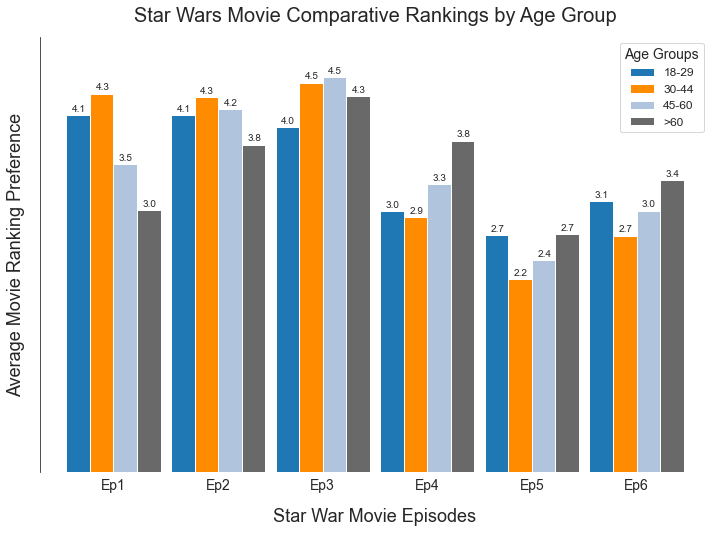

In [16]:
# calculate the mean for each
# subgroup within each age group.
g11 = grp1["R_Ep1_1999"].mean(axis=0)
g12 = grp1["R_Ep2_2002"].mean(axis=0)
g13 = grp1["R_Ep3_2005"].mean(axis=0)
g14 = grp1["R_Ep4_1977"].mean(axis=0)
g15 = grp1["R_Ep5_1980"].mean(axis=0)
g16 = grp1["R_Ep6_1983"].mean(axis=0)
g21 = grp2["R_Ep1_1999"].mean(axis=0)
g22 = grp2["R_Ep2_2002"].mean(axis=0)
g23 = grp2["R_Ep3_2005"].mean(axis=0)
g24 = grp2["R_Ep4_1977"].mean(axis=0)
g25 = grp2["R_Ep5_1980"].mean(axis=0)
g26 = grp2["R_Ep6_1983"].mean(axis=0)
g31 = grp3["R_Ep1_1999"].mean(axis=0)
g32 = grp3["R_Ep2_2002"].mean(axis=0)
g33 = grp3["R_Ep3_2005"].mean(axis=0)
g34 = grp3["R_Ep4_1977"].mean(axis=0)
g35 = grp3["R_Ep5_1980"].mean(axis=0)
g36 = grp3["R_Ep6_1983"].mean(axis=0)
g41 = grp4["R_Ep1_1999"].mean(axis=0)
g42 = grp4["R_Ep2_2002"].mean(axis=0)
g43 = grp4["R_Ep3_2005"].mean(axis=0)
g44 = grp4["R_Ep4_1977"].mean(axis=0)
g45 = grp4["R_Ep5_1980"].mean(axis=0)
g46 = grp4["R_Ep6_1983"].mean(axis=0)

display(Markdown('<h3><span style="color:blue"> X-Axis Legend  </span></h3>'))    
print("Ep1 = Star Wars: Episode I The Phantom Menace;      Released 1999")
print("Ep2 = Star Wars: Episode II  Attack of the Clones;  Released 2002")
print("Ep3 = Star Wars: Episode III  Revenge of the Sith;  Released 2005")
print("Ep4 = Star Wars: Episode IV  A New Hope;            Released 1977")
print("Ep5 = Star Wars: Episode V The Empire Strikes Back; Released 1980")
print("Ep6 = Star Wars: Episode VI Return of the Jedi;     Released 1983")

# generate a bar graph for each group within each movie episode.
df=pd.DataFrame({"18-29":(g11,g12,g13,g14,g15,g16), "30-44":(g21,g22,g23,g24,g25,g26),
                 "45-60":(g31,g32,g33,g34,g35,g36), ">60":(g41,g42,g43,g44,g45,g46)},
                index=["Ep1","Ep2", "Ep3", "Ep4", "Ep5", "Ep6"])

# I've chosen color shades within the color blind palette.
ax = df.plot(kind="bar", color=["tab:blue","darkorange","lightsteelblue","dimgray"],
             width=0.9, figsize=(12,8), ylim=(0,5))
plt.title("Star Wars Movie Comparative Rankings by Age Group", fontsize=20, pad=15)
ax.set_xlabel("Star War Movie Episodes", fontsize=18, labelpad=15)
ax.set_ylabel("Average Movie Ranking Preference", fontsize=18, labelpad=15)
plt.xticks(fontsize=14, rotation=0)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=False, labelleft=False)
ax.legend(fontsize=12, title='Age Groups',title_fontsize=14)

# establish position of bar values at top of bars
x_offset = -0.06
y_offset = 0.04
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.1f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

## <span style="color:green">Question #6 Answer</span>

All the age groups are in agreement regarding overall first choice movie: _"Episode V - The Empire Strikes Back"_.

However, there are some other interesting differences between age groups.

For example, viewers over 60 preferred _"Star Wars: Episode I The Phantom Menace"_ as second choice while it was fourth choice across all ages. Also, viewers over 60 showed a large difference in preference between the Episode I, II and III movies while viewers in the age ranges 18-29 and 30-44 showed very little difference.

<h3><span style="color:blue"> X-Axis Legend  </span></h3>

Ep1 = Star Wars: Episode I The Phantom Menace;      Released 1999
Ep2 = Star Wars: Episode II  Attack of the Clones;  Released 2002
Ep3 = Star Wars: Episode III  Revenge of the Sith;  Released 2005
Ep4 = Star Wars: Episode IV  A New Hope;            Released 1977
Ep5 = Star Wars: Episode V The Empire Strikes Back; Released 1980
Ep6 = Star Wars: Episode VI Return of the Jedi;     Released 1983


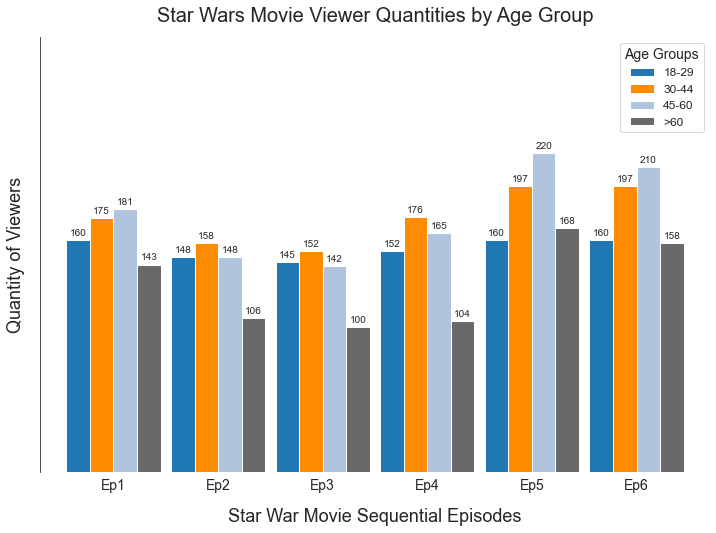

In [17]:
# calculate the sum for each
# subgroup within each age group.
v11 = grp1["Episode_1"].sum(axis=0)
v12 = grp1["Episode_2"].sum(axis=0)
v13 = grp1["Episode_3"].sum(axis=0)
v14 = grp1["Episode_4"].sum(axis=0)
v15 = grp1["Episode_5"].sum(axis=0)
v16 = grp1["Episode_6"].sum(axis=0)
v21 = grp2["Episode_1"].sum(axis=0)
v22 = grp2["Episode_2"].sum(axis=0)
v23 = grp2["Episode_3"].sum(axis=0)
v24 = grp2["Episode_4"].sum(axis=0)
v25 = grp2["Episode_5"].sum(axis=0)
v26 = grp2["Episode_6"].sum(axis=0)
v31 = grp3["Episode_1"].sum(axis=0)
v32 = grp3["Episode_2"].sum(axis=0)
v33 = grp3["Episode_3"].sum(axis=0)
v34 = grp3["Episode_4"].sum(axis=0)
v35 = grp3["Episode_5"].sum(axis=0)
v36 = grp3["Episode_6"].sum(axis=0)
v41 = grp4["Episode_1"].sum(axis=0)
v42 = grp4["Episode_2"].sum(axis=0)
v43 = grp4["Episode_3"].sum(axis=0)
v44 = grp4["Episode_4"].sum(axis=0)
v45 = grp4["Episode_5"].sum(axis=0)
v46 = grp4["Episode_6"].sum(axis=0)

display(Markdown('<h3><span style="color:blue"> X-Axis Legend  </span></h3>'))    
print("Ep1 = Star Wars: Episode I The Phantom Menace;      Released 1999")
print("Ep2 = Star Wars: Episode II  Attack of the Clones;  Released 2002")
print("Ep3 = Star Wars: Episode III  Revenge of the Sith;  Released 2005")
print("Ep4 = Star Wars: Episode IV  A New Hope;            Released 1977")
print("Ep5 = Star Wars: Episode V The Empire Strikes Back; Released 1980")
print("Ep6 = Star Wars: Episode VI Return of the Jedi;     Released 1983")

# generate a bar graph for each group within each movie episode.
df=pd.DataFrame({"18-29":(v11,v12,v13,v14,v15,v16), "30-44":(v21,v22,v23,v24,v25,v26),
                 "45-60":(v31,v32,v33,v34,v35,v36), ">60":(v41,v42,v43,v44,v45,v46)},
                index=["Ep1","Ep2", "Ep3", "Ep4", "Ep5", "Ep6"])

# I've chosen color shades within the color blind palette.
colors=["tab:blue","darkorange","lightsteelblue","dimgray"]
ax = df.plot(kind='bar', color=colors, width=0.9, figsize=(12,8), ylim=(0,300))
plt.title("Star Wars Movie Viewer Quantities by Age Group", fontsize=20, pad=15)
ax.set_xlabel("Star War Movie Sequential Episodes", fontsize=18, labelpad=15)
ax.set_ylabel("Quantity of Viewers", fontsize=18, labelpad=15)
plt.xticks(fontsize=14, rotation=0)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=False, labelleft=False)
ax.legend(fontsize=12, title='Age Groups',title_fontsize=14)

# estblish position of bar values at top of bars
x_offset = -0.08
y_offset = 3
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

### Observations

I suppose the most interesting observation for me here is that there is very little difference in quantity of viewers for all six movies for **age group 18-29**.

Perhaps many of the viewers in this age range had not seen the first three movies when initially released between 1977 to 1983 and decided they must watch the movies released between 1999 and 2003 first regardless of how bad they were ranked because of the movie plot sequence.

## <span style="color:blue">Last Question</span>

There are fourteen characters identified in the survey who were portrayed in some or all of the movies. Who were the top 5 most liked and the bottom 5 most disliked?

In [18]:
# create column titles that relate to the character names.
star_wars2 = star_wars2.rename(columns={
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":
    "Han_Solo"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 16": "Luke_Skywalker"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 17": "Princess_Leia_Organa"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 18": "Anakin_Skywalker"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 19": "Obi_Wan_Kenobi"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 20": "Emperor_Palpatine"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 21": "Darth_Vader"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 22": "Lando_Calrissian"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 23": "Boba_Fett"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 24": "C_3P0"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 25": "R2_D2"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 26": "Jar_Jar_Binks"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 27": "Padme_Amidala"})
star_wars2 = star_wars2.rename(columns={"Unnamed: 28": "Yoda"})

# convert the verbal rank descriptions to numeric
# values from 1 to 5 by using mapping.
mapping = {"Very favorably": "5", "Somewhat favorably": "4",\
           "Neither favorably nor unfavorably (neutral)": "3",\
           "Somewhat unfavorably": "2", "Very unfavorably": "1",\
           "Unfamiliar (N/A)": "0"}

star_wars2["Han_Solo"] = star_wars2["Han_Solo"].replace(mapping)
star_wars2["Luke_Skywalker"] = star_wars2["Luke_Skywalker"].replace(mapping)
star_wars2["Princess_Leia_Organa"] = star_wars2["Princess_Leia_Organa"].replace(mapping)
star_wars2["Anakin_Skywalker"] = star_wars2["Anakin_Skywalker"].replace(mapping)
star_wars2["Obi_Wan_Kenobi"] = star_wars2["Obi_Wan_Kenobi"].replace(mapping)
star_wars2["Emperor_Palpatine"] = star_wars2["Emperor_Palpatine"].replace(mapping)
star_wars2["Darth_Vader"] = star_wars2["Darth_Vader"].replace(mapping)
star_wars2["Lando_Calrissian"] = star_wars2["Lando_Calrissian"].replace(mapping)
star_wars2["Boba_Fett"] = star_wars2["Boba_Fett"].replace(mapping)
star_wars2["C_3P0"] = star_wars2["C_3P0"].replace(mapping)
star_wars2["R2_D2"] = star_wars2["R2_D2"].replace(mapping)
star_wars2["Jar_Jar_Binks"] = star_wars2["Jar_Jar_Binks"].replace(mapping)
star_wars2["Padme_Amidala"] = star_wars2["Padme_Amidala"].replace(mapping)
star_wars2["Yoda"] = star_wars2["Yoda"].replace(mapping)

characters = star_wars2[star_wars2.columns[15:29]].apply(pd.to_numeric)
print(characters.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1186
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Han_Solo              829 non-null    float64
 1   Luke_Skywalker        831 non-null    float64
 2   Princess_Leia_Organa  831 non-null    float64
 3   Anakin_Skywalker      823 non-null    float64
 4   Obi_Wan_Kenobi        825 non-null    float64
 5   Emperor_Palpatine     814 non-null    float64
 6   Darth_Vader           826 non-null    float64
 7   Lando_Calrissian      820 non-null    float64
 8   Boba_Fett             812 non-null    float64
 9   C_3P0                 827 non-null    float64
 10  R2_D2                 830 non-null    float64
 11  Jar_Jar_Binks         821 non-null    float64
 12  Padme_Amidala         814 non-null    float64
 13  Yoda                  826 non-null    float64
dtypes: float64(14)
memory usage: 109.7 KB
None


## Generate a Bar Chart

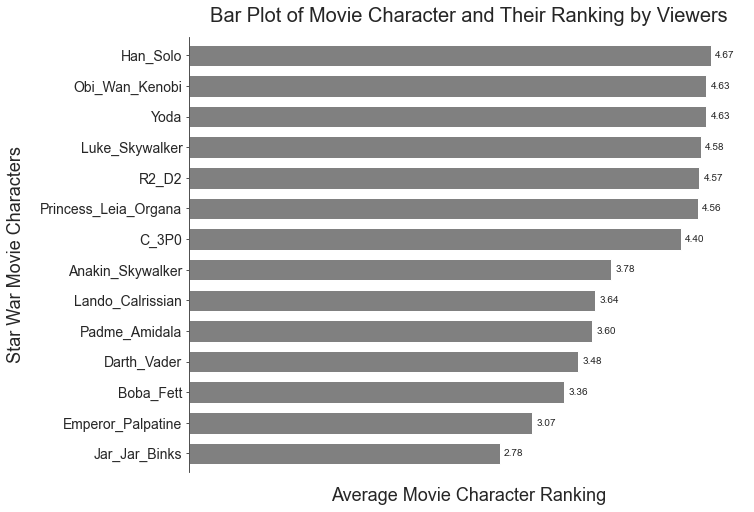

In [19]:
cols = ["Jar_Jar_Binks", "Emperor_Palpatine", "Boba_Fett",\
        "Darth_Vader", "Padme_Amidala", "Lando_Calrissian",\
        "Anakin_Skywalker", "C_3P0", "Princess_Leia_Organa",\
        "R2_D2", "Luke_Skywalker", "Yoda", "Obi_Wan_Kenobi",\
        "Han_Solo"]

# remove 0 from the data in that it is not a ranked value.
character_means = characters[characters[cols]!= 0].mean()
character_means = character_means.sort_values(ascending=True)

# generate a bar chart to reflect rank values
# for each Star Wars movie character listed in survey.
colors=["grey"]
ax = character_means.plot(kind="barh", color=colors, width=0.70, figsize=(10,8),
                          xlim=(0,5))
plt.title("Bar Plot of Movie Character and Their Ranking by Viewers", fontsize=20, pad=15)
ax.set_xlabel("Average Movie Character Ranking", fontsize=18, labelpad=15)
ax.set_ylabel("Star War Movie Characters", fontsize=18, labelpad=15)
plt.yticks(fontsize=14)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

# estblish position of bar values at top of bars
x_offset = .04
for y, x in enumerate(character_means[cols]):
    plt.annotate("{0:.2f}".format(x), xy=(x + x_offset, y), va='center')


## <span style="color:green">Last Question Answer</span>

Regarding this data, the higher the rank value, **the more** that particular character was liked by viewers.

The top 5 movie characters liked the most by viewers are ranked very close: Han_Solo, Obi_Wan_Kenobi, Yoda, Luke_Skywalker and R2_D2.

The bottom 5 movie characters disliked the most by viewers are: Padme_Amidala, Darth_Vader, Boba_Fett, Emperor_Palpatine and Jar_Jar_Binks. The differences among these 5 is more than the differences between the top 5.

## Project Summary

The survey results confirmed the claim of the team at "FiveThirtyEight": _"Star Wars Episode V The Empire Strikes Back"_ is the best among the first six Star Wars movies released.

So what about my preferences? Well, it's been so long since I watched all six movies and I've watched so many other non-Star Wars movies since then that I really can't remember my order of preferences. Oh well. 

What I do remember though is that I thought the movie with the _"Ewoks"_ in it, _"Return of the Jedi"_ was quite "cheezy". That movie was ranked as second choice in this survey. One of my other differences is that I actually liked the character _Jar_Jar_Binks_, yet he was the least liked movie character in this survey.

**Conclusion:** We all have different reasons why we like or dislike something in the field of entertainment. It's great to have that freedom and be different among each other while maintaining great relationships!

**May the Source <span style="color:gray">_(code)_</span> be with you!!**